# Librerías

In [2]:
import numpy as np #para manejar arreglos
from matplotlib import pyplot as plt #para graficar
import sympy as sp

# Practica 2

## Euler

Hacer el metodo de euler es lo mismo que hacer un taylor de orden 1, donde tenemos que:

$y_{i+1} = y_i + h \cdot f(t_i,y_i) $

In [2]:
def euler( t0, tf, z0, f, h = None, N = None):
  
  if h is None and N is None:
    raise ValueError("Debe proporcionar h o N")
  if h is not None and N is not None:
    raise ValueError("Debe proporcionar h o N, no ambos")
  if N is not None:
    h = (tf - t0)/N
  if h is not None:
    N = int((tf-t0)/h)

  t = np.linspace(t0,tf,N + 1)
  z = np.zeros((len(z0),N+1))
  z[:,0] = z0
  
  for i in range(N):
    z[:,i+1] = z[:,i] + h*f(t[i],z[:,i])

  return t,z,h,N

## Taylor orden 2

Taylor de orden 2 de toda la vida

$y_{i+1} = y_i + h \cdot f(t_i,y_i) + \frac{h^2}{2} [f_t(t_i,y_i) + f_y(t_i,y_i) \cdot f(t_i,y_i)]$

In [3]:
def taylor_orden_dos(t0,tf,x0,f,h = None, N = None):

    if h is None and N is None:
        raise ValueError("Debe proporcionar h o N")
    if h is not None and N is not None:
        raise ValueError("Debe proporcionar h o N, no ambos")
    if N is not None:
        h = (tf - t0)/N
    if h is not None:
        N = int((tf-t0)/h)
    
    t, x = sp.symbols('t x', real=True)
    f_t = sp.diff(f, t)
    f_x = sp.diff(f, x)

    f    = sp.lambdify((t, x), f,"numpy")
    f_tl = sp.lambdify((t, x), f_t,"numpy")
    f_xl = sp.lambdify((t, x), f_x,"numpy")
  

    # Defino la grilla equiespaciada
    t = np.linspace(t0, tf, N + 1)
    # Guardo lugar para la solución de la EDO
    x = np.zeros(N+1)
    # Uso la condición inicial
    x[0]= x0
    # Obtengo la aproximación via la ecuación de recurrencia del método de Taylor
    for i in range(N):
        x[i+1] = x[i]+h*f(t[i],x[i]) + (1/2)*(f_tl(t[i],x[i]) + f_xl(t[i],x[i])*f(t[i],x[i]))*(h**2)

    # Devuelvo la grilla y la solución aproximada
    return t, x, h, N

## Euler modificado

In [4]:
def euler_modificado(t0, tf, z0, f, h = None, N = None):

    if h is None and N is None:
        raise ValueError("Debe proporcionar h o N")
    if h is not None and N is not None:
        raise ValueError("Debe proporcionar h o N, no ambos")
    if N is not None:
        h = (tf - t0)/N
    if h is not None:
        N = int((tf-t0)/h)

    t = np.linspace(t0,tf,N+1)
    z = np.zeros((len(z0),N+1))
    z[:,0] = z0

    for i in range(N):
        z[:,i+1] = z[:,i] + h*f(t[i] + h/2,z[:,i] + (h/2)*f(t[i],z[:,i]))

    return t,z,h,N

## Ejercicios

### Ejercicio 1
Escribir un programa que implemente el método de Euler explícito para resolver
ecuaciones de la forma

$y' = f(t,y), \qquad y(t_0) = y_0$,

tomando como parámetros la función $f$, los tiempos inicial y final $t_0$ y $t_f$, el paso $h$ y el dato
inicial $y_0$; y arrojando como resultados el vector 
$t = (t_0,\, t_0 + h,\, \ldots,\, t_f)$
y la solución $y$.

In [5]:
def euler_ejercicio1(t0,tf,x0,h,f):
  N = int((tf-t0)/h)
  T = np.linspace(t0,tf,N+1)
  X = np.zeros(N+1)
  X[0] = x0

  for i in range(N):
    X[i+1] = X[i] + h*f(T[i],X[i])
  return T,X,h

### Ejercicio 2
Se considera la siguiente ecuación diferencial

\begin{cases}
y'(t) = 2y(t) - 5\sin(t), \\
y(0) = 1,
\end{cases}

cuya solución exacta es la función y(t) = 2\sin(t) + \cos(t).

Cantidad de pasos = 0.001


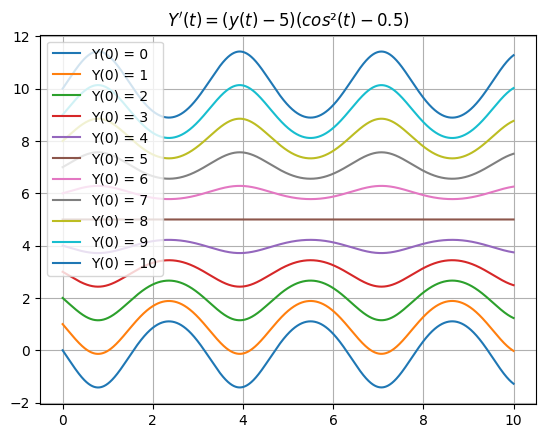

In [6]:
k = np.arange(0,11)
plt.figure()
plt.title(r"$Y'(t) = (y(t)-5)(cos²(t)-0.5)$")

for i in k:
  T,Y,h,N = euler(0,10,np.array([i]),lambda t,y: (y-5)*((np.cos(t))**2-0.5),h = 0.001)
  plt.plot(T,Y[0],'-',label = f'Y(0) = {i}')

plt.grid()
plt.legend()

print(f'Cantidad de pasos = {h}')

### Ejercicio 3
Se considera la siguiente ecuación diferencial:

\begin{cases}
y'(t) = 2y(t) - 5\sin(t), \\
y(0) = 1
\end{cases}

cuya solución exacta es la función $y(t) = 2\sin(t) + \cos(t)$.

(a) Escribir la iteración del método de Euler para esta ecuación. 

(b) Calcular el error de truncado local. 

(c) ¿Qué paso $h$ debe elegirse para que el error al estimar 



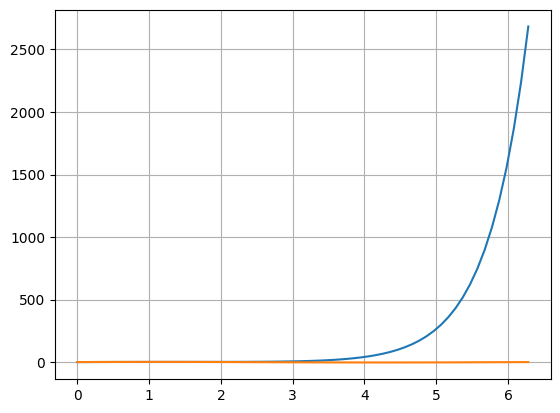

In [7]:


T, Y , h, N = euler(0,2*np.pi,np.array([1]),lambda t, y:2*y - 5*sp.sin(t), h = 0.1)

def y_real(t):
    return 2*np.sin(t) + np.cos(t)

Y_real = y_real(T)


plt.figure()
plt.plot(T,Y[0],'-')
plt.plot(T,Y_real)
plt.grid()




### Ejercicio 5
Se quiere verificar num\'ericamente el orden de convergencia de los m\'etodos de
Euler y Taylor de orden 2. Para ello: resolver num\'ericamente el problema
$y' = y$, $y(0) = 1$,
en el intervalo $[0, 1]$ con ambos m\'etodos, tomando $h = 2^{-k}$ para $k = 2, \ldots , 8$. 
Para cada $h$ calcular el error que se comete al aproximar $y(1)$: 
$e_h = |y(1) - y_N|$. Graficar $\log(e_h)$ en funci\'on de $\log(h)$. 

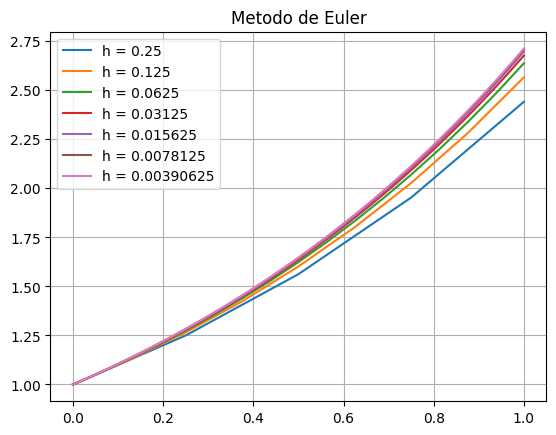

In [8]:
k = np.arange(2,9)
h = []

for i in k:
  h.append(float(2)**(-i))

h = np.array(h)

plt.figure()
plt.title('Metodo de Euler')

for i in h:
  T,Y,h,N = euler(0,1,np.array([1]),lambda t,y:y,h = i)
  plt.plot(T,Y[0],label = f'h = {h}')

plt.grid()
plt.legend()

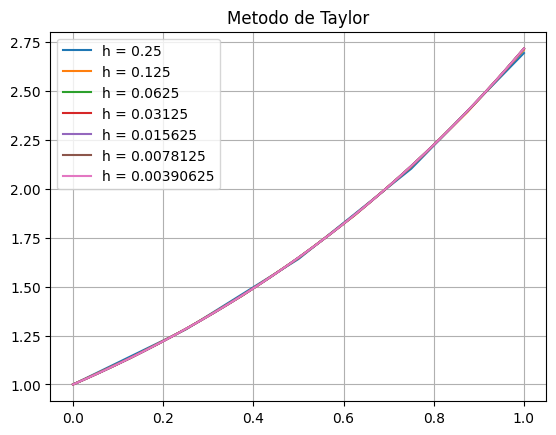

In [9]:
k = np.arange(2,9)
h = []

for i in k:
  h.append(float(2)**(-i))

h = np.array(h)

plt.figure()
plt.title('Metodo de Taylor')

x ,t = sp.symbols('x t', real=True)
funcion = x

for i in h:
  T,Y,h,N= taylor_orden_dos(0,1,1,funcion, h = i)
  plt.plot(T,Y,label = f'h = {i}')

plt.grid()
plt.legend()

### Ejemplo guia
Estudiamos el sistema (el PVI mejor dicho):
$$
\begin{cases}
x'&= -0.5x+0.02xy\\
y' &= y-0.02xy\\
x(0)&=4 \\
y(0) &= 20
\end{cases}
$$
Donde $x$ es la población de predadores, $y$ la de presas.

(2, 30001)
[4.         3.9996     3.99920151 3.99880454]


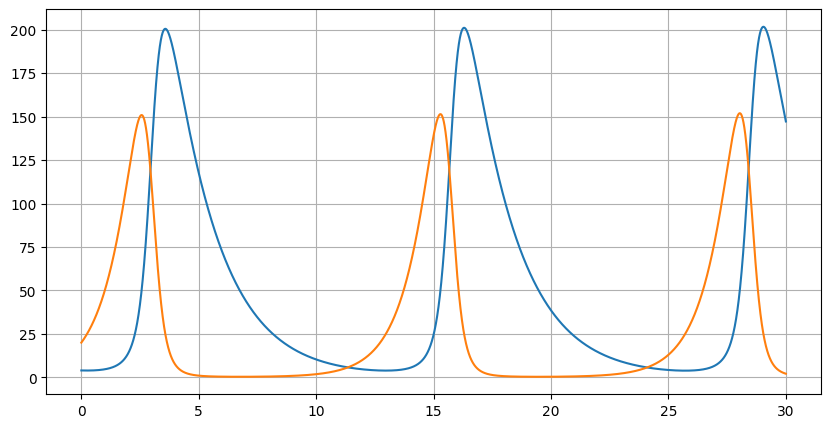

In [10]:
T,Z, h, N = euler(0,30,np.array([4,20]),lambda t,z: np.array([-0.5*z[0] + 0.02*z[0]*z[1],z[1] - 0.02*z[0]*z[1]]), h = 10**(-3))
print(Z.shape)
print(Z[0,0:4])
plt.figure(figsize=(10,5))
plt.plot(T,Z[0],label = 'Predadores')
plt.plot(T,Z[1],label = 'Presas')
plt.grid()

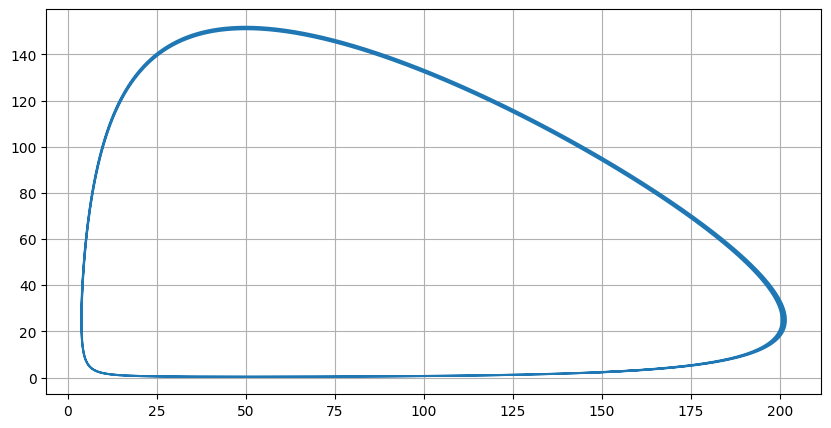

In [11]:
plt.figure(figsize=(10,5))
plt.plot(Z[0,:],Z[1,:])
plt.grid()

### Ejercicio 13
La posición de un objeto en caída libre puede modelarse con la ecuación:

$\begin{equation}
    \ddot{x} = \frac{\gamma}{m} \dot{x}^{2} - g
\end{equation}$

siendo $x$ la altura, $m$ la masa del cuerpo, $g = 9.81 \,\text{m/s}^{2}$ la aceleración gravitatoria y $\gamma$ una
constante que representa el rozamiento con el fluido en que se produce la caída. Deben darse
condiciones sobre la altura y la velocidad iniciales.


La Torre de Pisa mide $55.8 \,\text{m}$. La masa de una bala de cañón es de $16 \,\text{Kg}$, y la de una
bala de mosquete $0.0082 \,\text{Kg}$. Las constantes de rozamiento para cada bala son:$ \gamma_{c} = 0.0058 \quad \text{y} \quad \gamma_{m} = 3.74 \times 10^{-5}$, respectivamente (la diferencia se debe a la diferencia de tamaños).


$\ddot{x} = \frac{\gamma}{m} \cdot \dot{x}^2-g$ 

$$
\begin{cases}
    x_1 = x \\
    x_2 = \dot{x} \\
    \dot{x_1} = x_2 \\
    \dot{x_2} = \frac{\gamma}{m} \cdot x_2^2-g
\end{cases}


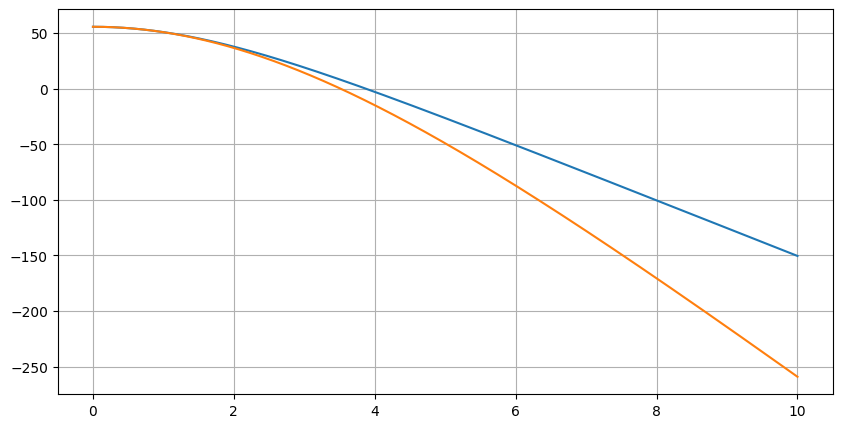

In [12]:
g = 9.81
gamma_c = 0.25
gamma_m = 3.74e-5
m_c = 16
m_m = 0.0082
z0 = np.array([55.8,0])


Tc,Zc, h, N = euler(0,10,z0,lambda t,z: np.array([z[1],(gamma_c/m_c)*(z[1]**2) - g]), h = 10**(-3))
Tm,Zm, h, N = euler(0,10,z0,lambda t,z: np.array([z[1],(gamma_m/m_m)*(z[1]**2) - g]), h = 10**(-3))



plt.figure(figsize=(10,5))
plt.plot(Tc,Zc[0],label = 'Caida cañon')
plt.plot(Tc,Zm[0],label = 'Caida mosquete')
plt.grid()



### Ejercicio 14
Tiro oblicuo: Un proyectil de masa $m$ se arroja desde un punto del plano
$(x_0, y_0)$, con una velocidad inicial dada por el vector $(v_{x0}, v_{y0})$.
La trayectoria del proyectil se rige por las ecuaciones dadas por la segunda
ley de Newton:

$m \ddot{x} = -\gamma \dot{x},
\qquad$
$m \ddot{y} = -mg - \gamma \dot{y}$

donde $g$ es la aceleración gravitatoria $g = 9.81 \,\text{m/s}^{2}$, y
$\gamma$ es una constante de rozamiento con el medio en que se realiza el
lanzamiento. Formular el problema en forma de sistema de orden uno.



Tomando $m = 10 \,\text{Kg}$ y $\gamma = 0.2 \,\text{Kg/s}$, y suponiendo que
el proyectil se lanza desde $30 \,\text{m}$ de altura con una velocidad inicial
horizontal de $40 \,\text{m/s}$, ¿qué distancia recorre antes de tocar el piso?


\begin{cases}
\dot{x} = v_x, \\[6pt]
\dot{v}_x = -\dfrac{\gamma}{m} v_x, \\[6pt]
\dot{y} = v_y, \\[6pt]
\dot{v}_y = -g - \dfrac{\gamma}{m} v_y.
\end{cases}

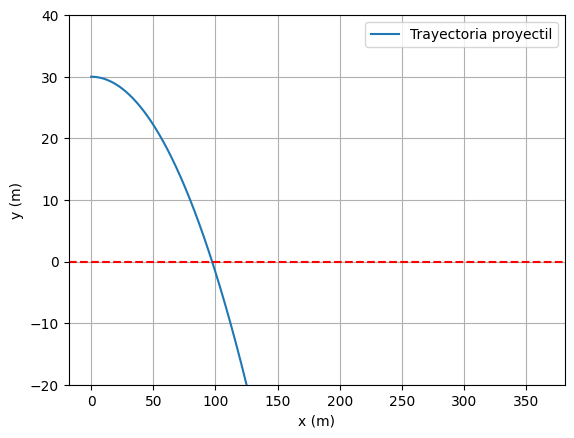

In [13]:
g = 9.81
m = 10
gamma = 0.2
z0 = np.array([0,40,30,0])

T,Z,h,N = euler_modificado(0, 10, z0, lambda t,z : np.array([z[1],-(gamma/m)*z[1],z[3],-(gamma/m)*z[3]-g]), h = 1e-3)

plt.figure()
plt.plot(Z[0],Z[2],label = 'Trayectoria proyectil')
plt.axhline(0,linestyle = '--',color = 'red')

plt.xlabel('x (m)')
plt.ylabel('y (m)') 
plt.legend()
plt.ylim(-20,40)
plt.grid()

### Ejercicio 15
Durante un brote de una enfermedad en la ciudad de Macondo se puede dividir
a la población entre los grupos $\textit{susceptibles}$ de contraer la enfermedad $(S)$,
$\textit{infectadxs}$ $(I)$ y $\textit{recuperadxs}$ $(R)$. La relación entre el número de personas en cada
grupo está definida por el siguiente sistema de ODEs:

\begin{aligned}
\frac{dS}{dt} &= -\beta\,\frac{S I}{N},\\
\frac{dI}{dt} &= \beta\,\frac{S I}{N} - \gamma I,\\
\frac{dR}{dt} &= \gamma I.
\end{aligned}

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente.

(a) Interpretar el sentido de las ecuaciones.

(b) Considerar que la ciudad tiene una población de $N = 10000$ habitantes e inicialmente
todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta = 0.2$ y
un tiempo medio de recuperación de 10 días. Si inicialmente hay una única persona enferma,
discutir de qué forma deberían evolucionar las poblaciones de cada grupo.

(c) Simular y graficar la soluci´on que se obtiene al utilizar el comando scipy.integrate.
solve_ivp, que aplica un m´etodo de Runge-Kutta de orden 4.

(d) Asumiendo que no se producen fallecimientos, verificar que la poblaci´on de la ciudad se
mantiene constante a lo largo de la simulacìon.

(e) Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones
comienza a descender.

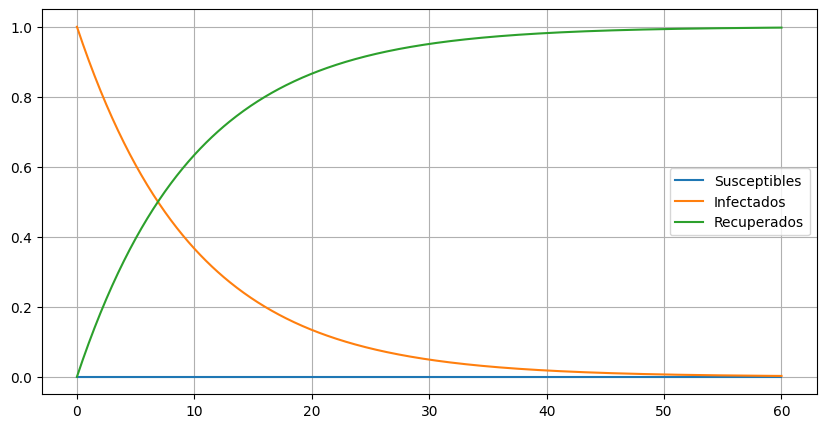

In [14]:
N = 10000
beta = 0.2
gamma = 1/10

T,Z,h,N = euler(0,60,np.array([0,1,0]),lambda t,z: np.array([-beta*z[0]*z[1]/N,beta*z[0]*z[1]/N - gamma*z[1],gamma*z[1]]), h = 0.1)


plt.figure(figsize=(10,5))
plt.plot(T,Z[0],label = 'Susceptibles')
plt.plot(T,Z[1],label = 'Infectados')
plt.plot(T,Z[2],label = 'Recuperados')

plt.legend()
plt.grid()

# Practica 3

## Contornos

La idea de este metodo es que tenemos una funcion del estilo:

$a \ddot{y}(t) + k \ddot{y}(t) + c y(t) = f(t)$ 

Primero discrtizamos utilizando la discretizacion usual para $\ddot{y}(t)$:

$\ddot{y}(t) \approx \frac{y_{i+1} -2 y_{i} + y_{i-1}}{h^2}$

Para discretizar $\dot{y}(t)$:

$\dot{y}(t) \approx \frac{y_{i+1}-y_{i-1}}{2h}$

Reemplazando en la ecuacion anterior llegamos a:

$y_{i+1} (2a+hk) + y_{i} (2h^2c-4a) + y_{i-1}(2a-hk) = 2h^2 f_i$

Si usamos las condiciones de contorno $y_0$ e $y_N$ llegamos al sistema:

\begin{cases}
    y_{2} (2a+hk) + y_{1} (2h^2c-4a) = 2h^2 f_1 - y_{0}(2a-hk) \\
    y_{3} (2a+hk) + y_{2} (2h^2c-4a) + y_{1} (2a-hk) = 2h^2 f_2 \\
    ...\\
    y_{N} (2a+hk) + y_{N-2} (2h^2c+4a) = 2h^2 f_N-1 - y_{N}(2a+hk)
\end{cases}

Este sistema lo podemos reducir en el siguiente sistema matricial:

$$
\begin{bmatrix}
    (2h^2c-4a) & (2a+hk) & 0 & 0 & ... & 0 \\
    (2a-hk) & (2h^2c-4a) & (2a+hk) & 0 & ... & 0 \\
    0 & (2a-hk) & (2h^2c-4a) & (2a+hk) & ... & 0 \\
    0 & 0 & (2a-hk) & ... & ... & 0 \\
    ... & ... & ... & ... & ... & (2a+hk) \\
    0 & 0 & 0 & 0 & (2a-hk) & (2h^2c-4a) 

\end{bmatrix}

\begin{bmatrix}
    y_1 \\
    y_2 \\
    y_3 \\
    ... \\
    y_{N-2} \\
    y_{N-1} \\
\end{bmatrix}

= 
\begin{bmatrix}
    2h^2 f_1 - y_{0}(2a-hk)\\
    2h^2 f_2 \\
    2h^2 f_3 \\
    ... \\
    2h^2 f_{N-2} \\
    2h^2 f_{N-1}- y_{N}(2a+hk) \\
\end{bmatrix}

$$

Y resolviendo este sistema de $Ay = b$ puedo obtener y de 1 a N-1, por lo que con las condiciones de contorno armo:

$y(t) = [y_0,y,y_N]$

In [15]:
def contornos(t0,tf,z0,a,k,c,f = lambda t: 0,h = None,N = None):
    if h is None and N is None:
        raise ValueError("Debe proporcionar h o N")
    if h is not None and N is not None:
        raise ValueError("Debe proporcionar h o N, no ambos")
    if N is not None:
        h = (tf - t0)/N
    if h is not None:
        N = int((tf-t0)/h)

    t = np.linspace(t0,tf,N+1)

    diagonal =  (-4*a + 2*(h**2)*c) * np.eye(N-1)
    diagonal_inferior = (2*a - h*k) * np.eye(N-1,k = -1)
    diagonal_superior = (2*a + h*k) * np.eye(N-1, k = 1)


    A = diagonal + diagonal_inferior + diagonal_superior    

    b = np.zeros(N-1)

    for i in range(0,N-1):
        b[i] = 2*(h**2)*f(t[i])

    b[0] -= z0[0]*(2*a - h*k)
    b[-1] -= z0[1]*(2*a + h*k)

    x = np.zeros(N+1)
    x[1:N] = np.linalg.solve(A,b)
    x[0] = z0[0]
    x[-1] = z0[1]

    return A, b, x, t, h, N 



## Ejercicios

### Ejercicio 3
Se tiene una masa sujeta a un resorte. Suponiendo que no existe rozamiento, la posición $y(t)$ de la masa a tiempo $t$ está regida por la ecuación:

$m\ddot{y} = -ky$,


donde $m$ es la masa y $k$ la constante del resorte.
Supongamos que la masa se encuentra en movimiento y que se registra que su posición a tiempo $0$ es $y(0)=0$, mientras que a cierto tiempo $t_f$, es $y(t_f)=y_f$.

(a) Discretizar el intervalo $[0, t_f ]$ con paso h. Utilizando la discretizaci´on usual para la
derivada segunda y teniendo en cuenta las condiciones de contorno, discretizar el
problema, formul´andolo como un sistema lineal.

(b) Hacer un programa que reciba como input la masa m, la constante k y el paso h,
construya la matriz del sistema, lo resuelva, y grafique la solución.

(c) Resolver para tf = 10, con los siguientes datos:

* $y_f = 1, m = \frac{1}{4}, k = \frac{1}{2}$
* $y_f = 1, m = 0.025, k = \frac{1}{2}$
* $y_f = 1, m = \frac{1}{4}, k = 0.05$
* $y_f = 1, m = 0.025, k = 0.05$

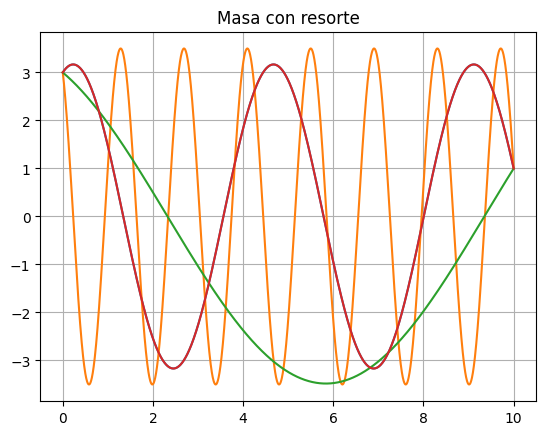

In [16]:
plt.figure()
plt.title('Masa con resorte')

for k in [0.5,0.05]:
    for m in [0.25,0.025]:
        A,b,x,t,h,N = contornos(0,10,np.array([3,1]),m,0,k,h = 0.005)
        plt.plot(t,x)

plt.grid()


### Ejercicio 4

Si al problema anterior se le agrega rozamiento y un forzante se obtiene
una ecuación de la forma
\begin{equation}
m\,\ddot y \;=\; -k\,y \;-\; c\,\dot y \;+\; f, 
\qquad \text{donde } b \text{ es el coeficiente de rozamiento y } f = f(t) \text{ el forzante.}
\end{equation}


(a) Escribir el sistema discretizado que corresponde a utilizar la discretización usual de
  la derivada segunda y diferencias centradas para la derivada primera.

(b) Repetir usando diferencias \emph{forward} para la derivada primera.

(c) Modificar el programa del ejercicio anterior para incorporar los nuevos términos de
  la ecuación utilizando diferencias centradas o \emph{forward} para la derivada primera.

(d) Para $f=0$ proponer soluciones de la forma $y(t)=A e^{\lambda t}$. Hallar valores de
  $\lambda$ en función de los parámetros $m$, $k$ y $c$. Estudiar el comportamiento de la solución de
  acuerdo a la naturaleza de los valores de $\lambda$ hallados.

(e) Resolver tomando $y_0=1$, $t_f=10$, $y_f=0$, con distintas combinaciones de los
  parámetros:

* $m=0.25$,  $m=0.025$.

* $k=0.5$,  $k=0.05$.

* $c=5\times 10^{-3}$,  $c=0.05$,  $c=0.1$.
  
Analizar si los resultados obtenidos son cualitativamente consistentes con lo esperado.


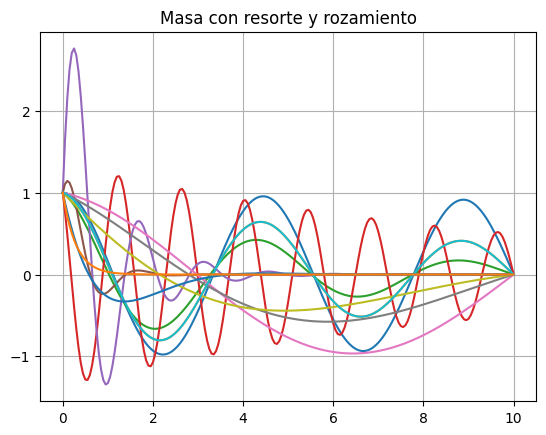

In [17]:
plt.figure()
plt.title('Masa con resorte y rozamiento')

for k in [0.5,0.05]:
    for m in [0.25,0.025]:
        for c in [5e-3,0.05,0.1]:
            A,b,x,t,h,N = contornos(0,10,np.array([1,0]),m,c,k,f = lambda t: 0,h = 0.05)
            plt.plot(t,x,label = f'm = {m}, b = {c}, k = {k}')

plt.grid()


### Ejercicio 6
Considerar el problema del calor estacionario en el intervalo $[0,1]$:
\begin{equation}
  -\alpha\,u''(x) = f(x),
  \qquad
  u(0) = u(1) = 0,
\end{equation}
donde $u$ representa la distribución de temperatura generada por una fuente $f$ y
$\alpha > 0$ es el coeficiente de difusividad térmica.


(a) Formular el problema de forma matricial.

(b) Estudiar el error de truncado.

(c) Resolver y graficar la solución para distintos valores de $\alpha$.


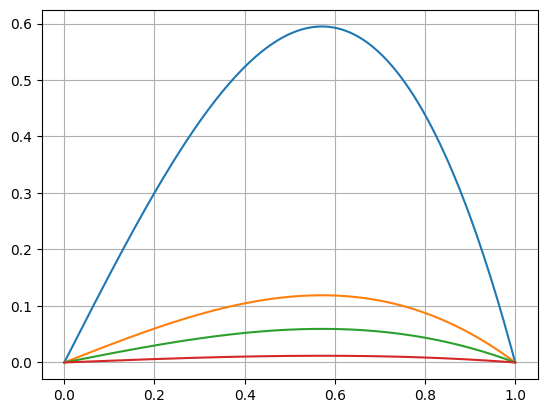

In [18]:
plt.figure()

alpha = np.array([0.1,0.5,1,5])*(-1)

for i in alpha:
    A,b,x,t,h,N = contornos(0,1,np.array([0,0]),i,0,0,f = lambda t: np.sin(t),h = 0.005)
    plt.plot(t,x)

plt.grid()

# Practica 4

## Ejercicios

### Ejercicio 1
Escribir un codigo que calculen las normas de $A \in \Reals^{n \times n}$:

(a) $||A||_{\infty} = max_{1 \le i \le n} \sum_{j = 1}^n |a_{ij}|$

(b) $||A||_{1} = max_{1 \le i \le n} \sum_{i = 1}^n |a_{ij}|$


In [19]:
A = np.random.rand(4,4)
print(f'Matriz A: \n {A}')

print(f'Norma 1: {np.linalg.norm(A, 1)}')
print(f'Norma infinito:  {np.linalg.norm(A, np.inf)}')

Matriz A: 
 [[0.21557257 0.31901003 0.25808623 0.06637894]
 [0.45885395 0.60881626 0.84943289 0.3428148 ]
 [0.47500189 0.61964045 0.7095015  0.38705369]
 [0.27562547 0.52491679 0.78270529 0.17087573]]
Norma 1: 2.5997258980506683
Norma infinito:  2.2599178965137328


### Ejercicio 3
Se quiere estimar la norma 2 de una matriz $A \in \Reals^{3 \times 3}$ como el maximo del valor de $\frac{||Ax||_2}{||A||_2}$ entre varios vectores $x \in \Reals^3$ no nulos generados al azar. Hacer un programa que reciba una matriz $A$ y luego 

* genere los primeros 100 terminos de la sucesion :

$s_1 = 0$,  $s_{k+1} = max\{sk,\frac{||Ax_k||_2}{||x_k||_2}\}$

donde los $x_k \in \Reals^3$ son vectores no nulos generados al azar distribuidos uniformemente en el cirtulo unitario

* Grafique la sucesion calculada, junto con el valor exacto de la norma de la matriz.

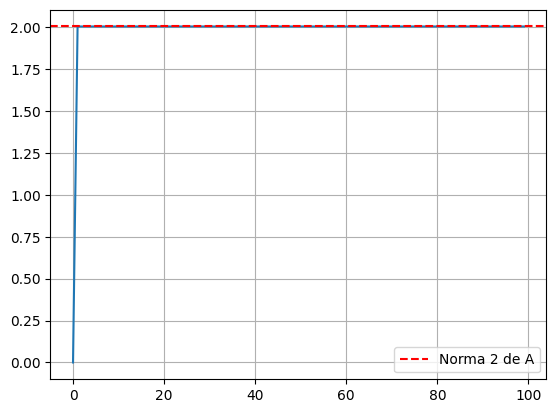

In [96]:
vectores  = np.random.rand(100,3)
vectores /= np.linalg.norm(vectores,ord = 2,axis = 1,keepdims=True)

s = np.zeros(100)
s[0] = 0

A = np.random.rand(3,3)


s[1:] = max(np.linalg.norm(A @ vectores.T, axis = 0)/(np.linalg.norm(vectores.T, axis = 0)))

plt.figure()
plt.plot(s[0:])
plt.axhline(np.linalg.norm(A,2),color = 'red', linestyle = '--', label = 'Norma 2 de A')
plt.grid()
plt.legend()


### Ejercicio 5
Sea 

$$
A = 
\begin{bmatrix}
    3 & 0 & 0 \\
    0 & 5/4 & 3/4 \\
    0 & 3/4 & 5/4 
\end{bmatrix}
$$

(a) Calcular $Cond_2(A)$ y $Cond_{\infty}(A)$  

(b) ¿Cuàn chico debe ser el error en los datos $(b − b^*)$, si se desea que el error en la
aproximaci´on de la soluci´on sea menor que 10−4?

(c) Realizar experimentos num´ericos para verificar las estimaciones del ìtem anterior.
Considerar $b = (3, 2, 2)^t$, que se corresponde con la soluciòn exacta $x = (1, 1, 1)^t$.
Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica
como la estimada en el item anterior y perturbar $b$ obteniendo $b^*$. Finalmente,
resolver $Ax^* = b^*$ y verificar que $∥x^* − x∥ < 10^{−4}$

In [ ]:
A = np.array([[3,0,0],[0,5/4,3/4],[0,3/4,5/4]], dtype = float)

cond_2 = np.linalg.norm(A,2)
cond_inf = np.linalg.norm(A,np.inf)

print(f'Condición en norma 2: {cond_2}')
print(f'Condición en norma infinito: {cond_inf}')

b = np.array([3,2,2], dtype = float)

Condición en norma 2: 3.0
Condición en norma infinito: 3.0


# Practica 5

Empezamos con u sistema de la forma:

$Ax = b$

Si $A$ no es singular en $\Reals^{n \times n}$ entonces podemos descomponer $A = M + N$, entonces,

$Ax = (M + N)x = Mx + Nx = b$

$x = -M^{-1} Nx + M^{-1} b$

y definiendo $B = -M^{-1} N$ y $C = M^{-1} b$ llegamos a 

$x_{k+1} = B x_k + C$, donde cada $x_k$ es un vector, no una componente

Si ahora pensamos en separar a A en A = L + D + U (diagonal inferior, diagonal y diagonal superior), podemos definir dos metodos:

* Jacobi: $B_j = -D^{-1}(L+U)$ , $C_j = D^{-1} b$
* Gauss-Seidel: $B_{gs} = -(L+D)_{-1} U$ , $C_{gs} = (L+D)^{-1} b$

## Metodo de Gauss Seidel

In [204]:
def gauss_seidel(A,b,x0,max_iter,tolearancia = 1e-10):

    L = np.triu(A,1)
    D = np.diag(np.diag(A))
    U = np.tril(A,-1)

    B = -np.linalg.inv(L + D) @ U
    C = np.linalg.inv(L + D) @ b
    
    x = np.zeros((max_iter + 1, x0.size))
    x[0] = x0

    i = 0
    while i < max_iter:
        x[i+1,:]= B @ x[i,:] + C
        i += 1
        if np.linalg.norm(x[i,:] - x[i-1,:]) < tolearancia:
            x_final = x[i,:]
            print(f'Convergió en {i} iteraciones')
            break
        if i == max_iter and np.linalg.norm(x[i,:] - x[i-1,:]) > tolearancia:
            x_final = x[i,:]
            print('No convergió en el número máximo de iteraciones')
    
    return x, x_final,i

## Metodo de Jacobi

In [205]:
def jacobi(A,b,x0,max_iter,tolearancia = 1e-10):

    L = np.triu(A,1)
    D = np.diag(np.diag(A))
    U = np.tril(A,-1)

    B = -np.linalg.inv(D) @ (L+U)
    C = np.linalg.inv(D) @ b
    
    x = np.zeros((max_iter + 1, x0.size))
    x[0] = x0

    i = 0
    while i < max_iter:
        x[i+1,:]= B @ x[i,:] + C
        i += 1
        if np.linalg.norm(x[i,:] - x[i-1,:]) <= tolearancia:
            x_final = x[i,:]
            print(f'Convergió en {i} iteraciones')
            break   
        if i == max_iter and np.linalg.norm(x[i,:] - x[i-1,:]) > tolearancia:
            x_final = x[i,:]
            print('No convergió en el número máximo de iteraciones')
            
    return x, x_final,i

## Ejercicios

#### Ejercicio 4

Considere el sistema $Ax = b$ para 

$$
A = 
\begin{bmatrix}
    64 &  -6 \\
    6 & -1 \\
\end{bmatrix}
,
b = 
\begin{bmatrix}
    1 \\
    2 \\
\end{bmatrix}
$$

(a) Demostrar que el metodo de Jacobi converge para todo dato inicial. Verificar, sin embargo, que la matriz no es diagonal dominante

Convergió en 46 iteraciones
No convergió en el número máximo de iteraciones


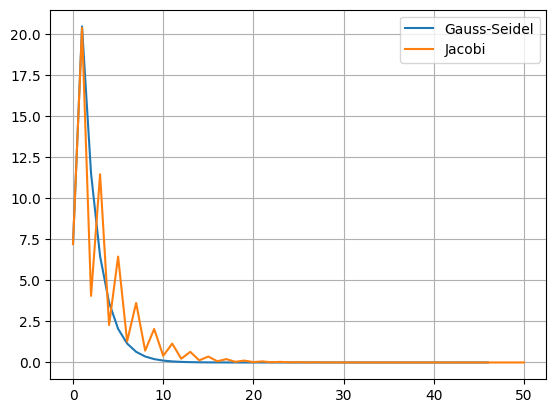

In [218]:
A = np.array([[64,-6],
              [6,-1]])
b = np.array([1,2])
x0 = np.array([3,2])

x_gauss,x_final_gauss,iter_final_gauss = gauss_seidel(A,b,x0,50,1e-10)
x_jacobi,x_final_jacobi,iter_final_jacobi = jacobi(A,b,x0,50,1e-10)

error_gauss = np.linalg.norm(x_gauss - x_final_gauss, axis = 1)
error_jacobi = np.linalg.norm(x_jacobi - x_final_jacobi, axis = 1)

plt.figure()
plt.plot(np.arange(iter_final_gauss + 1),error_gauss[0:iter_final_gauss+1],label = 'Gauss-Seidel')
plt.plot(np.arange(iter_final_jacobi + 1) ,error_jacobi[0:iter_final_jacobi+1],label = 'Jacobi')
plt.legend()
plt.grid()

#### Ejercicio 5
Decidir para cada uno de los siguientes sistemas, si los métodos de Jacobi y de
Gauss-Seidel son convergentes. En caso afirmativo usarlos para resolver el sistema. Si ambos
métodos convergen, determinar cúal converge más rápido. ¿Es la matriz del sistema diagonal
dominante? ¿y simétrica y definida positiva?

$$
(a)
\begin{bmatrix}
    3 & 1 & 1 \\
    2 & 6 & 1 \\
    1 & 1 & 4
\end{bmatrix}
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix}
= 
\begin{bmatrix}
    5 \\
    9 \\
    6
\end{bmatrix}
,
(b)
\begin{bmatrix}
    5 & 7 & 6 & 5 \\
    7 & 10 & 8 & 7 \\
    6 & 8 & 10 & 9  \\
    5 & 7 & 9 & 10
\end{bmatrix}

\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4
\end{bmatrix}
=
\begin{bmatrix}
    23 \\
    32 \\
    33 \\
    31
\end{bmatrix}
$$

Convergió en 15 iteraciones
Convergió en 43 iteraciones


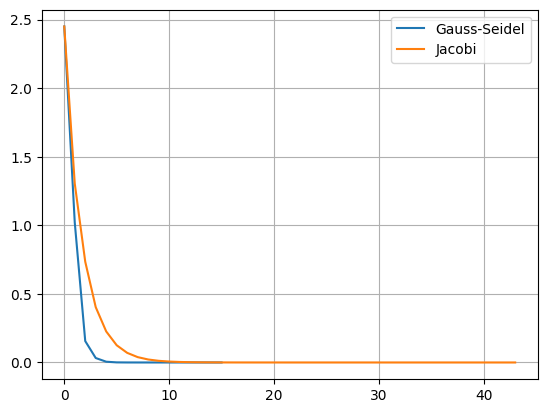

In [228]:
A = np.array([[3,1,1],
              [2,6,1],
              [1,1,4]])
b = np.array([5,9,6])
x0 = np.array([3,2,2])

x_gauss,x_final_gauss,iter_final_gauss = gauss_seidel(A,b,x0,100,1e-10)
x_jacobi,x_final_jacobi,iter_final_jacobi = jacobi(A,b,x0,100,1e-10)

error_gauss = np.linalg.norm(x_gauss - x_final_gauss, axis = 1)
error_jacobi = np.linalg.norm(x_jacobi - x_final_jacobi, axis = 1)

plt.figure()
plt.plot(np.arange(iter_final_gauss + 1),error_gauss[0:iter_final_gauss+1],label = 'Gauss-Seidel')
plt.plot(np.arange(iter_final_jacobi + 1) ,error_jacobi[0:iter_final_jacobi+1],label = 'Jacobi')
plt.legend()
plt.grid()

Convergió en 86 iteraciones
No convergió en el número máximo de iteraciones


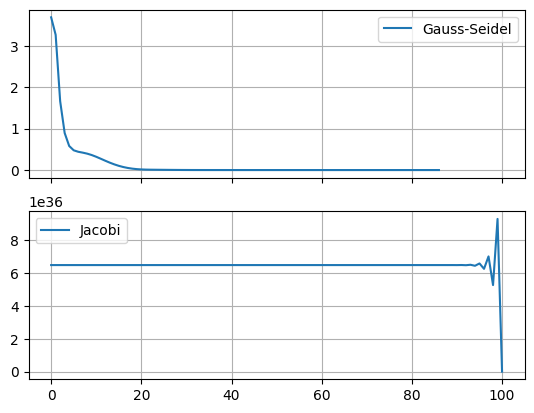

In [236]:
A = np.array([[7,5,8,5],
              [7,10,8,7],
              [6,8,10,9],
              [6,7,9,10]])
b = np.array([23,32,33,31])
x0 = np.array([3,2,2,3])

x_gauss,x_final_gauss,iter_final_gauss = gauss_seidel(A,b,x0,100,1e-10)
x_jacobi,x_final_jacobi,iter_final_jacobi = jacobi(A,b,x0,100,1e-10)

error_gauss = np.linalg.norm(x_gauss - x_final_gauss, axis = 1)
error_jacobi = np.linalg.norm(x_jacobi - x_final_jacobi, axis = 1)

fig, axs = plt.subplots(ncols = 1,nrows = 2,sharex = True)
axs[0].plot(np.arange(iter_final_gauss + 1),error_gauss[0:iter_final_gauss+1],label = 'Gauss-Seidel')
axs[1].plot(np.arange(iter_final_jacobi + 1) ,error_jacobi[0:iter_final_jacobi+1],label = 'Jacobi')
axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

# Pruebas